In [79]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from urllib.request import urlretrieve

# Beacon Data

In [126]:
beacon_metadata_url = 'http://icedef.munroelab.ca/data/StatoilArcticNet/drift_tracks/MunroeMetadata.csv'
beacon_metadata = pd.read_csv(drift_track_metadata_url)
beacon_metadata.head()

,BeaconID,IMEI,ArgosID,WMO,DataOwner,DataSharingRestrictions,Contact,BeaconType,Manufacturer,Transmitter,...,RelatedBeaconIDs,AdditionalDatasets,Project,Photos_Y_N,NumberPhotos,PhotoCredits,PhotoRestrictions,PhotoComments,PhotoNames,Comments
0,204980,300000000000000,NaN,NaN,"Water and Ice Research Laboratory, Carleton Un...",1,Derek Mueller,FT-2000,Solara,Iridium,...,"906790, 2790480, 2792490","sail/keel mapping with laser and multibeam, CT...",Statoil/ArcticNet Research Cruise 2015,Y,7,"Derek Mueller, Anna Crawford",4,NaN,"204980_2015_approaching the saddle berg 1.JPG,...",Beacon deployed during ArcticNet/Statoil/WIRL ...
1,505190,300000000000000,NaN,NaN,"Water and Ice Research Laboratory, Carleton Un...",1,Derek Mueller,FT-2000,Solara,Iridium,...,"907780, 2791420","photogrammetry, laser scanning",Statoil/ArcticNet Research Cruise 2015,Y,10,"Derek Mueller, Anna Crawford",4,NaN,"505190_2015_Approaching tabular berg.JPG, 5051...",Beacon deployed during ArcticNet/Statoil/WIRL ...
2,906790,300000000000000,NaN,NaN,"Water and Ice Research Laboratory, Carleton Un...",1,Derek Mueller,FT-2000,Solara,Iridium,...,"204980, 2790480, 2792490","sail/keel mapping with laser and multibeam, CT...",Statoil/ArcticNet Research Cruise 2015,Y,See 204980,See 204980,4,NaN,see 204980,Beacon deployed during ArcticNet/Statoil/WIRL ...
3,907780,300000000000000,NaN,NaN,"Water and Ice Research Laboratory, Carleton Un...",1,Derek Mueller,FT-2000,Solara,Iridium,...,"505190, 2791420","photogrammetry, laser scanning",Statoil/ArcticNet Research Cruise 2015,Y,See 505190,See 505190,4,NaN,see 505190,Beacon deployed during ArcticNet/Statoil/WIRL ...


In [127]:
def get_beacon_df(beacon_id):
    
    url = f'http://icedef.munroelab.ca/data/StatoilArcticNet/drift_tracks/0{beacon_id}_2015.csv'
    
    return pd.read_csv(url, parse_dates=['DataDate_UTC'])

beacon_id_list = list(drift_track_metadata['BeaconID'].values)

beacon_df_dict = {}

for beacon_id in beacon_id_list:
    
    beacon_df_dict[f'{beacon_id}'] = get_beacon_df(beacon_id)

In [128]:
beacon_df_dict['204980'].head()

,BeaconID,BeaconType,DataDate_UTC,TransmissionDate_UTC,Latitude,Longitude,VBatt,AT,ST,BP,Heading,Speed,LocAccuracy,MessageIndex,Satellites,GPSdelay,SNR,TTFF
0,204980,Solara,2015-04-24 15:16:06,NaN,51.45991,-51.55144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,204980,Solara,2015-04-24 15:16:40,NaN,51.45991,-51.55163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,204980,Solara,2015-04-24 15:17:14,NaN,51.45993,-51.55161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,204980,Solara,2015-04-24 15:17:48,NaN,51.45980,-51.55176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,204980,Solara,2015-04-24 15:18:14,NaN,51.46008,-51.55156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
beacon_204980_df = beacon_df_dict['204980']

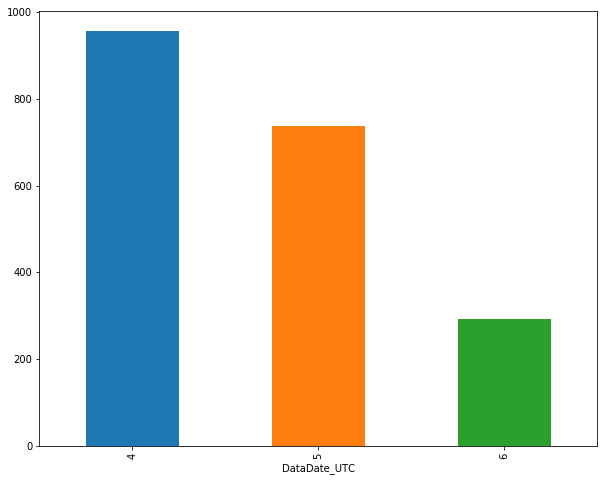

In [130]:
plt.figure(figsize=(10, 8))
beacon_204980_df['DataDate_UTC'].groupby(beacon_204980_df['DataDate_UTC'].dt.month).count().plot(kind="bar")
plt.show()

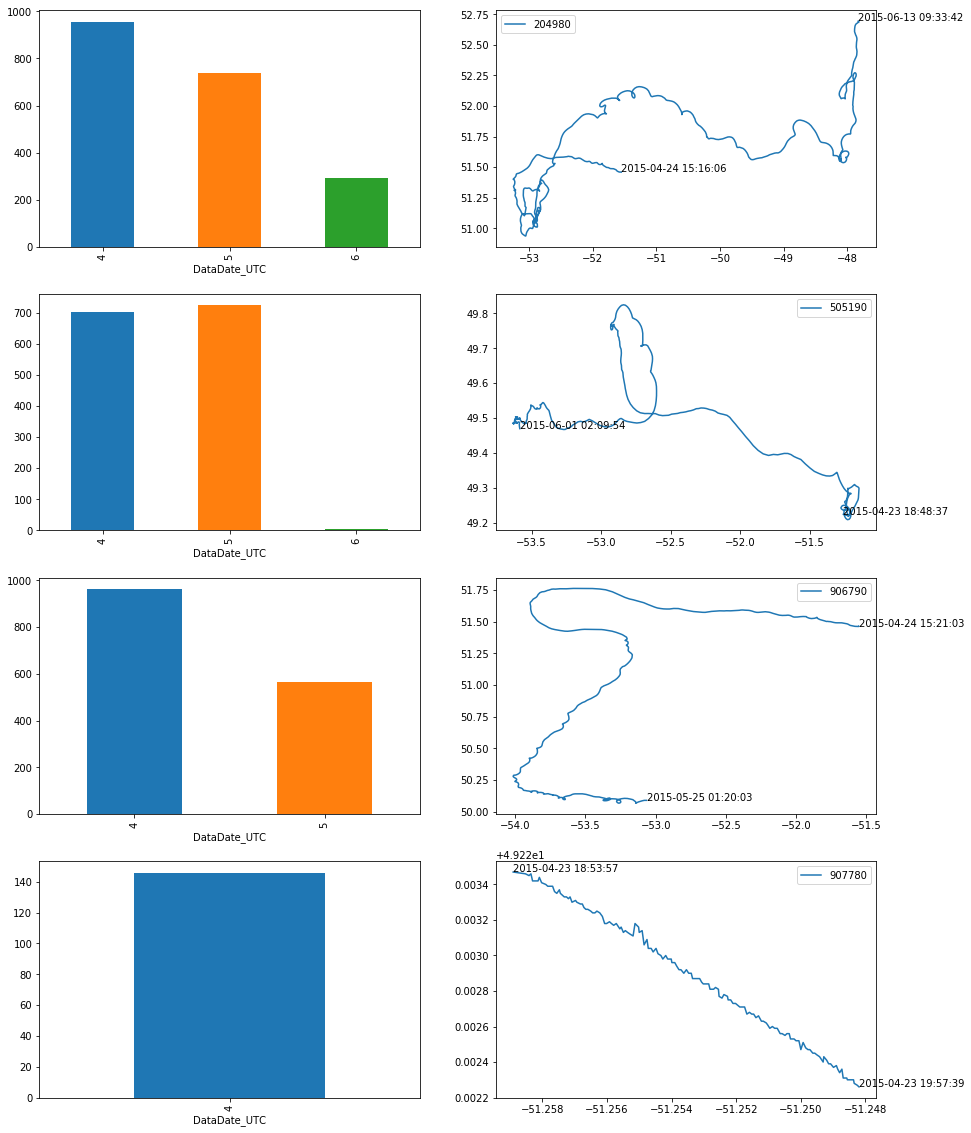

In [131]:
plt.figure(figsize=(15, 20))
i = 1
for key, df in beacon_df_dict.items():
    num_dfs = len(beacon_df_dict.keys())
    plt.subplot(num_dfs, 2, i)
    df['DataDate_UTC'].groupby(df['DataDate_UTC'].dt.month).count().plot(kind="bar", label=key)
    plt.subplot(num_dfs, 2, i + 1)
    plt.plot(df['Longitude'], df['Latitude'], label=key)
    plt.annotate(df['DataDate_UTC'][0], (df['Longitude'][0], df['Latitude'][0]))
    n = len(df)
    plt.annotate(df['DataDate_UTC'][n-1], (df['Longitude'][n-1], df['Latitude'][n-1]))
    plt.legend()
    i += 2
plt.show()

# AVOS Data

In [74]:
avos_df = pd.read_csv('http://icedef.munroelab.ca/data/StatoilArcticNet/AVOS_2015.csv', sep=' ; ')
bad_rows = np.where((avos_df['Longitude'] > 180) | (avos_df['Longitude'] < -180) |
                    (avos_df['Latitude'] > 180) | (avos_df['Latitude'] < -180))[0]

avos_df = avos_df.drop(avos_df.index[bad_rows])
avos_df['Date'] = avos_df['Date'].str.replace('/', '-')
avos_df['Date'] = pd.to_datetime(avos_df['Date'])
avos_df['Wind speed'] = pd.to_numeric(avos_df['Wind speed'])
avos_df['Wind dir'] = pd.to_numeric(avos_df['Wind dir'])

/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [76]:
min(avos_df['Date']), max(avos_df['Date'])

(Timestamp('2015-04-16 00:00:00'), Timestamp('2015-11-01 23:00:00'))

# ADCP Data

In [78]:
file_loc, message = urlretrieve('http://icedef.munroelab.ca/data/StatoilArcticNet/Leg1_1501_ADCP/an1501_os150bb.nc')

In [80]:
adcp_ds = xr.open_dataset(file_loc)

In [83]:
min(adcp_ds.time.values), max(adcp_ds.time.values) 

(numpy.datetime64('2015-04-17T12:32:17.000000000'),
 numpy.datetime64('2015-05-03T10:24:40.000000000'))

# UNION OF ALL DATA

In [132]:
max_of_mins = max([np.datetime64(min(beacon_df_dict['204980']['DataDate_UTC'])), 
                   np.datetime64(min(avos_df['Date'])), 
                   min(adcp_ds.time.values)])

min_of_maxs = min([np.datetime64(max(beacon_df_dict['204980']['DataDate_UTC'])), 
                   np.datetime64(max(avos_df['Date'])), 
                   max(adcp_ds.time.values)])

max_of_mins, min_of_maxs

(numpy.datetime64('2015-04-24T15:16:06.000000'),
 numpy.datetime64('2015-05-03T10:24:40.000000000'))

In [133]:
beacon_min_index = np.where(beacon_df_dict['204980']['DataDate_UTC'] >= max_of_mins)[0][0]
avos_min_index = np.where(avos_df['Date'] >= max_of_mins)[0][0]
adcp_min_index = np.where(adcp_ds.time.values >= max_of_mins)[0][0]

beacon_min_index, avos_min_index, adcp_min_index

(0, 178, 2023)

In [134]:
beacon_max_index = np.where(beacon_df_dict['204980']['DataDate_UTC'] <= min_of_maxs)[0][-1]
avos_max_index = np.where(avos_df['Date'] <= min_of_maxs)[0][-1]
adcp_max_index = np.where(adcp_ds.time.values <= min_of_maxs)[0][-1]

beacon_max_index, avos_max_index, adcp_max_index

(1011, 387, 4543)

## ADCP Union

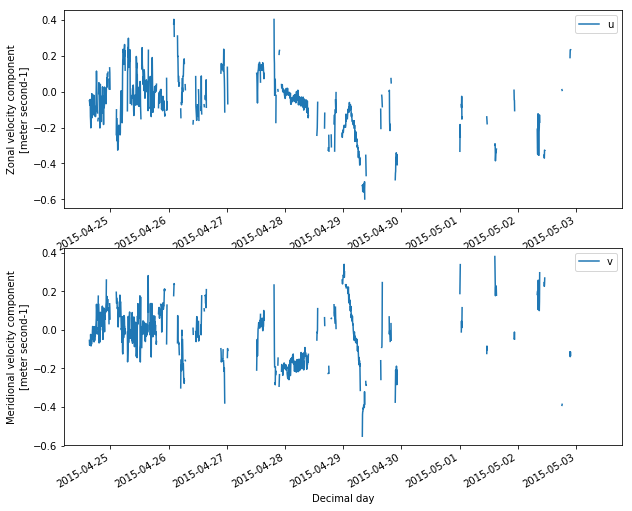

In [115]:
plt.figure(figsize=(10, 8))
keys = 'u', 'v'
for i, key in enumerate(keys):
    plt.subplot(len(keys), 1, i+1)
    adcp_ds[key][adcp_min_index : adcp_max_index + 1][:, 0].plot()
    plt.legend()
plt.show()

In [108]:
np.where(~(np.abs(adcp_ds.u.values[adcp_min_index : adcp_max_index + 1][:, 0] < 10)))[0]

array([  41,   45,   85, ..., 2518, 2519, 2520])

In [116]:
adcp_ds.u.values[adcp_min_index : adcp_max_index + 1][41, 0]

nan

## AVOS Union

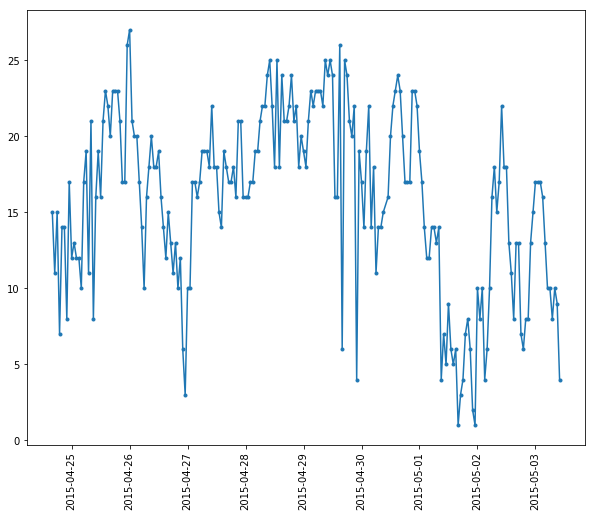

In [125]:
plt.figure(figsize=(10, 8))
plt.plot(avos_df['Date'][avos_min_index : avos_max_index + 1], 
         avos_df['Wind speed'][avos_min_index : avos_max_index + 1], '.-')
plt.xticks(rotation=90)
plt.show()

## Beacon Union

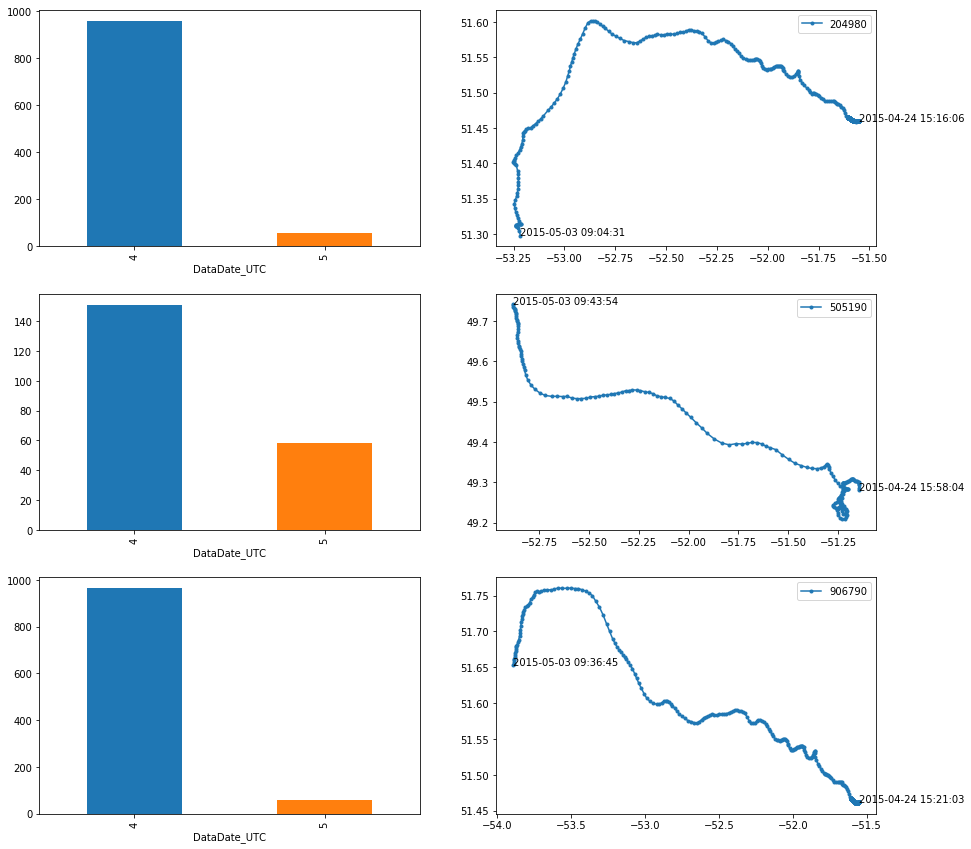

In [139]:
plt.figure(figsize=(15, 20))
num_dfs = len(beacon_df_dict.keys())
i = 1
for key, df in beacon_df_dict.items():
    try:
        beacon_min_index = np.where(df['DataDate_UTC'] >= max_of_mins)[0][0]
        beacon_max_index = np.where(df['DataDate_UTC'] <= min_of_maxs)[0][-1]
        df = df[beacon_min_index : beacon_max_index + 1].reset_index()
        plt.subplot(num_dfs, 2, i)
        df['DataDate_UTC'].groupby(df['DataDate_UTC'].dt.month).count().plot(kind="bar", label=key)
        plt.subplot(num_dfs, 2, i + 1)
        plt.plot(df['Longitude'], df['Latitude'], '.-', label=key)
        plt.annotate(df['DataDate_UTC'][0], (df['Longitude'][0], df['Latitude'][0]))
        n = len(df)
        plt.annotate(df['DataDate_UTC'][n-1], (df['Longitude'][n-1], df['Latitude'][n-1]))
        plt.legend()
    except IndexError:
        pass
    i += 2
plt.show()